Import required packages

In [2]:
# import packages
import matplotlib.pyplot as plt  # 추가
import numpy as np # NumPy
from PIL import Image # Python Image Library (PIL) https://pillow.readthedocs.io/en/stable/ - to load images 
import glob # Python module for pathnames https://docs.python.org/3/library/glob.html - to find files in folder
import dlib # for face detection http://dlib.net/ http://dlib.net/python/index.html 

#!wget   http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2 # DOWNLOAD LINK
#!bunzip2 /content/shape_predictor_5_face_landmarks.dat.bz2
#datFile =  "/content/shape_predictor_5_face_landmarks.dat"
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2
datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2023-03-28 11:53:54--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  --.-KB/s    in 0.08s   

2023-03-28 11:53:54 (66.5 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]

--2023-03-28 11:53:57--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  70.2MB/s    in 0.9s    

2023-03-28 11:53:57 (70.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ save

Mount google drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


load face images

In [4]:
# construct file list
db_path = '/content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/*.png'
db_path_list = glob.glob(db_path)
print(db_path_list)

# load face images
imgs = []
for f in db_path_list:
  print("load image: {}".format(f))
  img = dlib.load_rgb_image(f)
  imgs.append(img)
n_imgs = len(imgs)

# check image file variable format (should be numpy.ndarray)
print(type(imgs[0]))

['/content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/jeon.png', '/content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/joo.png', '/content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/lee.png', '/content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/park.png', '/content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/moon.png', '/content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/choi.png']
load image: /content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/jeon.png
load image: /content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/joo.png
load image: /content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/lee.png
load image: /content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/park.png
load image: /content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/moon.png
load image: /content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/choi.png
<class 'numpy.ndarray'>
imgs lenght is : 6


Perform face detection + 5-point facial landmark detection using Dlib

In [5]:
# initialize dlib face detector and facial landmark detector
detector = dlib.get_frontal_face_detector()
#sp = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat') #dlib의 랜드마크 5개의 모델
model = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat') #dlib의 랜드마크 68개의 모델

68개의 랜드마크 모델 이용

In [6]:
#right_eye_right = 36
#right_eye_left = 39
#left_eye_right = 42
#left_eye_left = 45
#nose = 33
#jawline = range[0, 16]
eyes = list(range(36, 46, 3)) # 각 눈의 왼,오 끝점
nose = [33] # 코 끝
jawline = list(range(0, 17, 4)) # 턱선 포인트

points = jawline + nose + eyes # landmarks 포인트의 list
print(points)

[0, 4, 8, 12, 16, 33, 36, 39, 42, 45]


In [25]:
det_faces = dlib.full_object_detections()
for i, img in enumerate(imgs):      # 각 이미지에 대해 얼굴 탐지
  print("detect faces from image: {}".format(db_path_list[i]))
  # detect faces in img using dlib frontal face detector 
  dets = detector(img, 1)
  # check number of detected faces
  print("Number of faces detected: {}".format(len(dets)))
  # print coordiates of detected face
  for i, d in enumerate(dets): 
    f = model(img, d)
    # 탐지
    #print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(  
    #       i, f.rect.left(), f.rect.top(), f.rect.right(), f.rect.bottom()))
    # 턱선 5점(0~4)
    #print("landmarks {}: jawline 1: {} jawline 2: {} jawline 3: {} jawline 4: {} jawline 5: {}".format(
    #     i, f.part(points[0]), f.part(points[1]), f.part(points[2]), f.part(points[3]), f.part(points[4])))
    # 코 끝(5) + 눈가 4개의 점(6~9)
    #print(" nose: {} left eye left: {} left eye right: {} right eye left: {} right eye right: {}".format(
    #      f.part(points[5]), f.part(points[6]), f.part(points[7]), f.part(points[8]), f.part(points[9])))

    det_faces.append(f)

detect faces from image: /content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/jeon.png
Number of faces detected: 1
Detection 0: Left: 287 Top: 64 Right: 442 Bottom: 219
landmarks 0: jawline 1: (267, 109) jawline 2: (283, 187) jawline 3: (352, 227) jawline 4: (400, 186) jawline 5: (413, 118)
 nose: (370, 153) left eye left: (321, 101) left eye right: (346, 106) right eye left: (380, 111) right eye right: (401, 113)
detect faces from image: /content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/joo.png
Number of faces detected: 1
Detection 0: Left: 180 Top: 57 Right: 366 Bottom: 242
landmarks 0: jawline 1: (162, 99) jawline 2: (185, 199) jawline 3: (264, 251) jawline 4: (334, 197) jawline 5: (353, 101)
 nose: (267, 166) left eye left: (209, 101) left eye right: (241, 105) right eye left: (290, 106) right eye right: (321, 103)
detect faces from image: /content/gdrive/MyDrive/Colab Notebooks/faces_the_glory/lee.png
Number of faces detected: 1
Detection 0: Left: 235 Top: 92 Right: 342 B

Overlay the bounding boxes and the 5 landmark points of the detected faces

In [13]:
import cv2
for i, img in enumerate(imgs):
  # make a copy of the input image
  img_cpy = img.copy()
  # get i_th face information
  f = det_faces[i]
  # draw bounding box (in green)
  cv2.rectangle(img_cpy,(f.rect.left(),f.rect.top()),(f.rect.right(),f.rect.bottom()),(0,255,0),3)
  # draw landmark points (in blue)
  for j in range(f.num_parts):
    cv2.circle(img_cpy, (f.part(j).x,f.part(j).y), 2, (0, 0, 255), -1)
  # save image with overlay
  dlib.save_image(img_cpy, f'img_{i}.png');

Now, let's align the faces

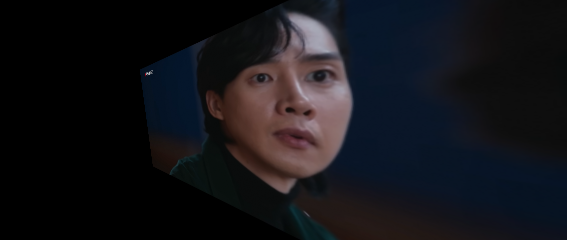

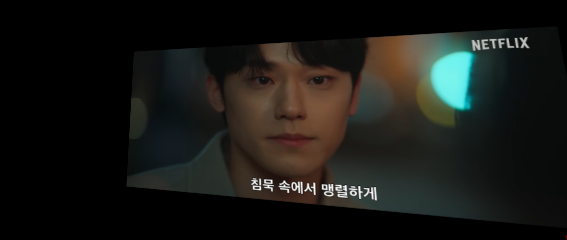

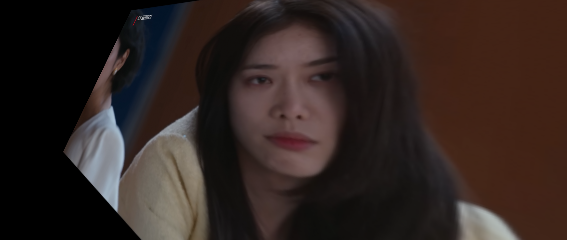

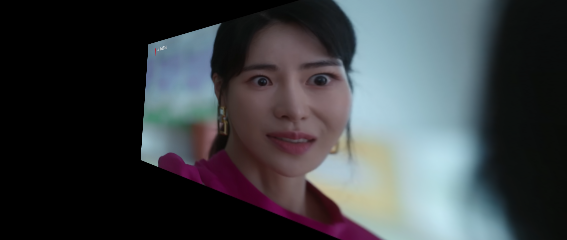

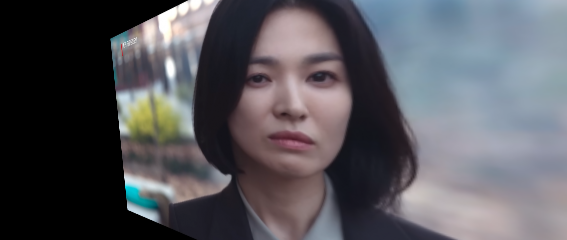

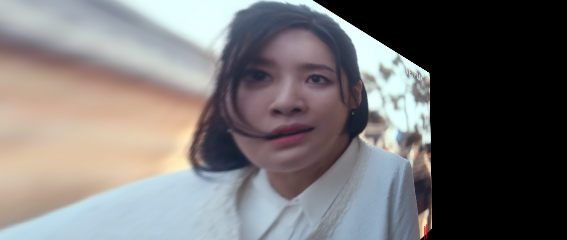

In [24]:
# target image == 68개 face landmarks 이미지 자료 출처: 'The-68-landmarks-detected-by-dlib-library-This-image-was-created-by-Brandon-Amos-of-CMU_fig2_329392737'
dst_img = cv2.imread('/content/gdrive/68_face_landmarks.png')
dst_points = np.array([[223,82], [236,142], [290,176], [343,142], [353,82], [290,120], [247,80], [274,80], [304,80], [330,80]])
for i, img in enumerate(imgs):
  src_img = img.copy()
  src_points = np.zeros((10,2), dtype=int)
  f = det_faces[i]
  for j in range(0,10):
    point = f.part(points[j])
    src_points[j] = (point.x, point.y)
  
  H, _ = cv2.findHomography(src_points, dst_points)
  transformed_img = cv2.warpPerspective(src_img, H, (567,240))
  pil_image=Image.fromarray(transformed_img)
  pil_image.show()



Dlib provides a function that does just this!

In [ ]:
for i, img in enumerate(imgs):
  dlib.save_image(dlib.get_face_chip(img, det_faces[i]),f'face_{i}.png')